In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Data

In [59]:
import glob
all_files = glob.glob("./*.csv")

li=[]

for filename in all_files:
    df=pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
    
us_census = pd.concat(li, axis=0, ignore_index=True)

In [60]:
us_census.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


# Checking data type

In [61]:
us_census.dtypes

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

# Checking columns

In [62]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

# Droping unnamed column

In [63]:
us_census.drop(columns=['Unnamed: 0'], inplace=True)

In [64]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

# Spliting GenderPop column into Male and Female columns

In [65]:
us_census[['Male', 'Female']] = us_census.GenderPop.str.split("_", expand=True)

In [66]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F,19087135M,19334329F


# Droping GenderPop column

In [67]:
us_census.drop(columns=['GenderPop'], inplace=True)

# Removing dollar sign

In [68]:
us_census['Income']=us_census.Income.str.strip('$')

# Removing % sign

In [69]:
us_census=us_census.replace('%','',regex=True)

# Removing F from female column entries

In [70]:
us_census=us_census.replace('F','',regex=True)

# removing M from Male column entries

In [71]:
us_census=us_census.replace('M','',regex=True)

In [72]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975,61.878656462585,31.25297619047618,0.4532312925170065,1.0502551020408146,0.03435374149659865,43296.35860306644,2341093,2489527
1,Alaska,733375,5.909580838323351,60.910179640718574,2.8485029940119775,16.39101796407186,5.450299401197604,1.0586826347305378,70354.74390243902,384160,349215
2,Arizona,6641928,29.565921052631502,57.120000000000026,3.8509868421052658,4.35506578947368,2.876578947368419,0.16763157894736833,54207.82095490716,3299088,3342840
3,Arkansas,2958208,6.215474452554738,71.13781021897813,18.968759124087573,0.5229197080291965,1.1423357664233578,0.14686131386861315,41935.63396778917,1451913,1506295
4,California,38421464,37.291874687968054,40.21578881677474,5.677396405391911,0.40529206190713685,13.052234148776776,0.35141038442336353,67264.78230266465,19087135,19334329


In [73]:
us_census.dtypes

State       object
TotalPop     int64
Hispanic    object
White       object
Black       object
Native      object
Asian       object
Pacific     object
Income      object
Male        object
Female      object
dtype: object

# Rounding upto 2 decimal values

In [74]:
us_census.loc[:,'Hispanic':'Income']=round(us_census.loc[:,'Hispanic':'Income'].apply(pd.to_numeric),2)

In [75]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329


In [76]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male         object
Female       object
dtype: object

# Changing Male column data type to int 

In [77]:
us_census['Male'] = us_census['Male'].astype(int)

# Checking for null values

In [78]:
np.where(us_census.applymap(lambda x: x == ''))

(array([23, 24, 31], dtype=int64), array([10, 10, 10], dtype=int64))

# Removing null values from Female column

In [79]:
us_census['Female'] = us_census['TotalPop'] - us_census['Male']

In [80]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
6,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810


In [81]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male          int32
Female        int64
dtype: object

# Ploting Histograms

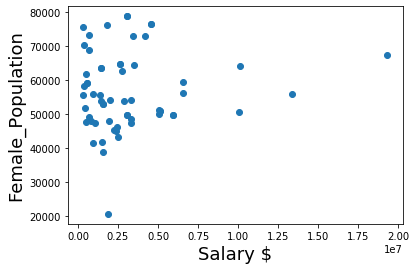

In [82]:
plt.scatter(us_census['Female'],us_census['Income'])
plt.xlabel('Salary $', fontsize=18)
plt.ylabel('Female_Population', fontsize=18)
plt.show()

# Checking for Duplicates

In [83]:
us_census.duplicated().any()

True

# Removing Duplicate values

In [84]:
us_census.drop_duplicates(inplace=True)

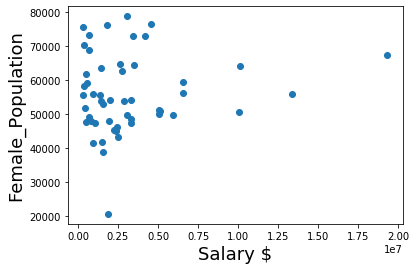

In [85]:
plt.scatter(us_census['Female'],us_census['Income'])
plt.xlabel('Salary $', fontsize=18)
plt.ylabel('Female_Population', fontsize=18)
plt.show()

In [86]:
us_census.duplicated().any()

False

In [87]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329
5,Colorado,5278906,20.78,69.90,3.55,0.57,2.66,NaN,64657.80,2648667,2630239
7,Connecticut,3593222,15.60,67.68,10.35,0.13,4.02,0.02,76146.56,1751607,1841615
8,Delaware,926454,8.82,64.63,20.74,0.26,3.27,NaN,61827.98,448413,478041
9,District of Columbia,647484,9.17,33.10,51.78,0.20,3.38,0.03,75466.36,306674,340810
10,lorida,19645772,21.34,59.08,15.17,0.21,2.28,0.05,50690.19,9600009,10045763


In [88]:
histo = round(us_census.loc[:,'Hispanic':'Pacific'].apply(lambda x:x*us_census['TotalPop']/100))

In [89]:
histo

,Hispanic,White,Black,Native,Asian,Pacific
0,181148.0,2989188.0,1509569.0,21738.0,50722.0,1449.0
1,43342.0,446699.0,20901.0,120200.0,39969.0,7774.0
2,1964018.0,3793869.0,255714.0,289588.0,191288.0,11291.0
3,184001.0,2104469.0,561172.0,15383.0,33724.0,4437.0
4,14327364.0,15453113.0,2182339.0,157528.0,5014001.0,134475.0
5,1096957.0,3689955.0,187401.0,30090.0,140419.0,NaN
7,560543.0,2431893.0,371898.0,4671.0,144448.0,719.0
8,81713.0,598767.0,192147.0,2409.0,30295.0,NaN
9,59374.0,214317.0,335267.0,1295.0,21885.0,194.0
10,4192408.0,11606722.0,2980264.0,41256.0,447924.0,9823.0


In [90]:
histo.dtypes

Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
dtype: object

# Checking if any nan values exist and removing them

In [91]:
histo.isnull().any()

Hispanic    False
White       False
Black       False
Native      False
Asian       False
Pacific      True
dtype: bool

In [92]:
histo.fillna(method='bfill', inplace=True)

In [93]:
histo.astype(int)

,Hispanic,White,Black,Native,Asian,Pacific
0,181148,2989188,1509569,21738,50722,1449
1,43342,446699,20901,120200,39969,7774
2,1964018,3793869,255714,289588,191288,11291
3,184001,2104469,561172,15383,33724,4437
4,14327364,15453113,2182339,157528,5014001,134475
5,1096957,3689955,187401,30090,140419,719
7,560543,2431893,371898,4671,144448,719
8,81713,598767,192147,2409,30295,194
9,59374,214317,335267,1295,21885,194
10,4192408,11606722,2980264,41256,447924,9823


# Ploting Histograms for races

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000062694DC108>]],
      dtype=object)

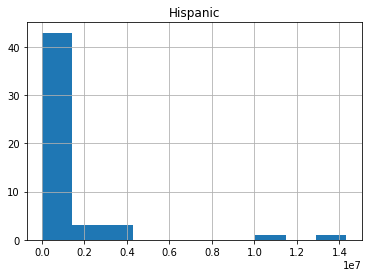

In [95]:
histo.hist(column='Hispanic')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000626A53C388>]],
      dtype=object)

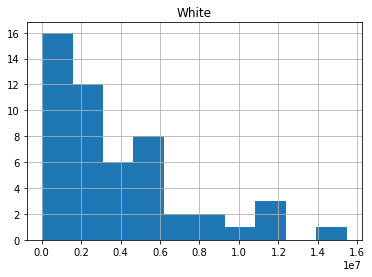

In [96]:
histo.hist(column='White')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000626A5CE508>]],
      dtype=object)

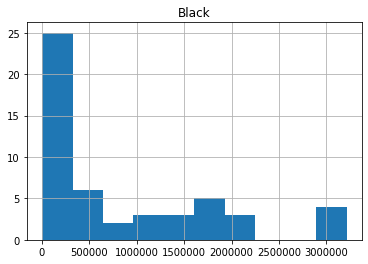

In [97]:
histo.hist(column='Black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000626A64CAC8>]],
      dtype=object)

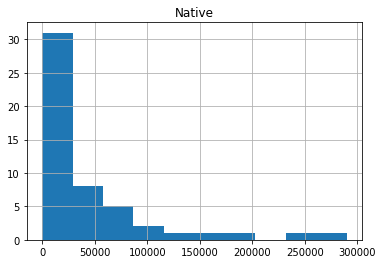

In [98]:
histo.hist(column='Native')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000626A535588>]],
      dtype=object)

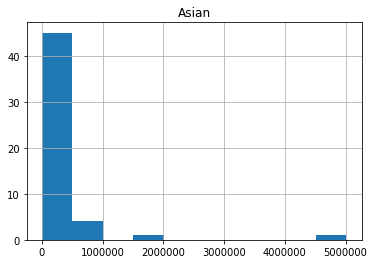

In [99]:
histo.hist(column='Asian')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000062693E1888>]],
      dtype=object)

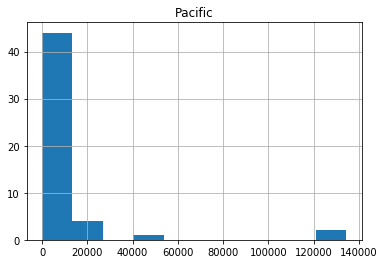

In [100]:
histo.hist(column='Pacific')